# Customer Churn Prediction

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Gaussian Naive Bayes

In [4]:
data=pd.read_excel("/content/churn_dataset.xlsx")

In [5]:
data.shape

(100, 4)

In [6]:
data.head()  # show first 5 raw

,Age,Tenure,Sex,Churn
0,56,8,Male,No
1,46,63,Female,No
2,32,11,Female,No
3,60,8,Male,No
4,25,35,Male,No


In [7]:
data.describe()

,Age,Tenure
count,100.00000,100.00000
mean,40.88000,35.03000
std,13.99082,21.65732
min,18.00000,1.00000
25%,30.50000,14.75000
50%,41.00000,35.00000
75%,53.25000,54.25000
max,64.00000,71.00000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     100 non-null    int64 
 1   Tenure  100 non-null    int64 
 2   Sex     100 non-null    object
 3   Churn   100 non-null    object
dtypes: int64(2), object(2)
memory usage: 3.3+ KB


In [9]:
data.isnull().sum()

,0
Age,0
Tenure,0
Sex,0
Churn,0


In [10]:
data.drop_duplicates(inplace=True)

In [12]:
data.shape

(100, 4)

In [13]:
data['Sex'] = data['Sex'].map({'Male': 1, 'Female': 0})


In [14]:
data['Churn'] = data['Churn'].map({'No': 0, 'Yes': 1})


In [15]:
data.head()

,Age,Tenure,Sex,Churn
0,56,8,1,0
1,46,63,0,0
2,32,11,0,0
3,60,8,1,0
4,25,35,1,0


In [18]:
data["Churn"].value_counts()  # data unbalance

,count
Churn,
0,75
1,25


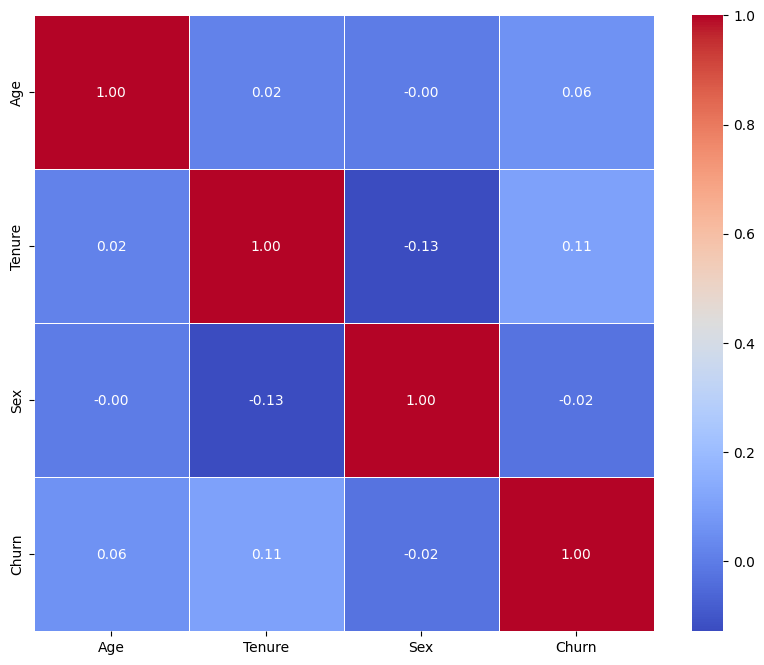

In [19]:
import seaborn as sns
plt.figure(figsize=(10,8))
corr=data.corr()
sns.heatmap(corr,annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

In [20]:
y=data["Churn"]

In [21]:
x=data.drop("Churn",axis=1)

In [22]:
print(x.shape)
print(y.shape)

(100, 3)
(100,)


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [25]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score

In [27]:
# Gaussian Naive Bayes Model
model_gnb = GaussianNB()
model_gnb.fit(x_train, y_train)

GaussianNB()

In [29]:
# Make Predictions
y_preds = model_gnb.predict(x_test)

In [36]:
print(y_preds)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [31]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_preds))

Accuracy: 0.55


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71        11
           1       0.00      0.00      0.00         9

    accuracy                           0.55        20
   macro avg       0.28      0.50      0.35        20
weighted avg       0.30      0.55      0.39        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
from sklearn.metrics import confusion_matrix

[[11  0]
 [ 9  0]]


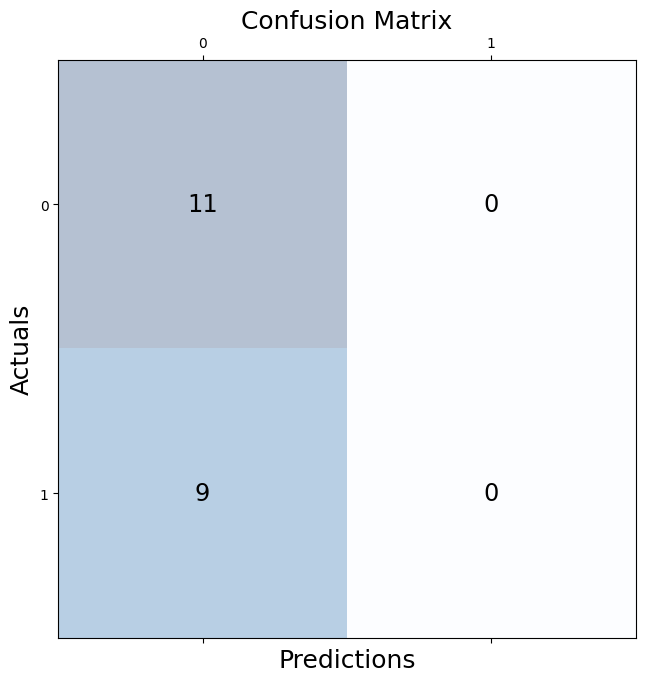

In [34]:
print(confusion_matrix(y_test,y_preds))

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_preds)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()